## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 6 is due on 3/24/2025

#Visualization in Python

Load up the `GSSvocab.csv` dataset into a pandas dataframe and and drop the rows with missing values.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('GSSvocab.csv')

# Drop rows with missing values
df = df.dropna()

# Inspect the first few rows
print(df.head())

print(df.dtypes)

   year  gender nativeBorn ageGroup educGroup  vocab  age  educ
0  1978  female        yes    50-59    12 yrs     10   52    12
1  1978  female        yes      60+   <12 yrs      6   74     9
2  1978    male        yes    30-39   <12 yrs      4   35    10
3  1978  female        yes    50-59    12 yrs      9   50    12
4  1978  female        yes    40-49    12 yrs      6   41    12
year           int64
gender        object
nativeBorn    object
ageGroup      object
educGroup     object
vocab          int64
age            int64
educ           int64
dtype: object


What is the data type of each variable? What do you think is the response variable the collectors of this data had in mind?

year           int64
gender        object
nativeBorn    object
ageGroup      object
educGroup     object
vocab          int64
age            int64
educ           int64
dtype: object

Likely response variable the collectors had in mind: "vocab" 

Create two different plots and identify the best-looking plot you can to examine the `age` variable. Save the best looking plot as an appropriately-named PDF.

Using plotnine

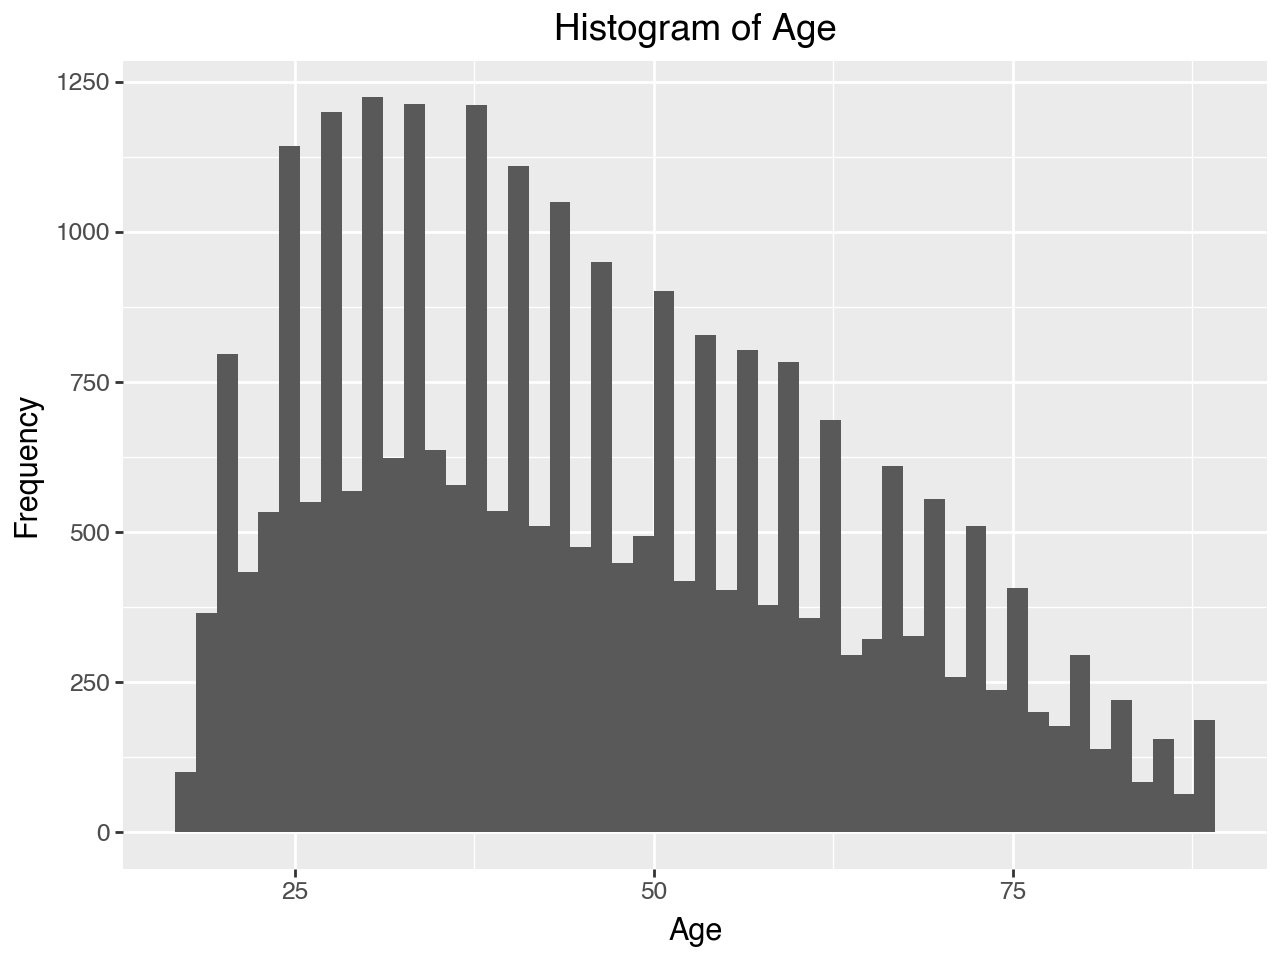

In [10]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs

# Plot 1: Histogram of age with 50 bins
hist_plot = (
    ggplot(df, aes(x='age')) +
    geom_histogram(bins=50) +
    labs(x='Age', y='Frequency', title='Histogram of Age')
)

# Plot 2: Density plot of age
density_plot = (
    ggplot(df, aes(x='age')) +
    geom_density(fill='blue', alpha=0.5) +
    labs(x='Age', y='Density', title='Density Plot of Age')
)

# Display the histogram first
hist_plot


In [11]:
Display second plot

SyntaxError: invalid syntax (3066788001.py, line 1)

In [ ]:
# Display the density plot
density_plot


Using Seaborn and Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram using Seaborn
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=50, kde=False)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Density plot using Seaborn
plt.figure(figsize=(8,6))
sns.kdeplot(df['age'], fill=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


We will use plotninem (https://plotnine.org/) as our visualization tool for the first half of this lab. Create two different plots and identify the best looking plot you can to examine the `vocab` variable. Save the best looking plot as an appropriately-named PDF.

In [ ]:
from plotnine import ggplot, aes, geom_bar, geom_jitter, labs, theme_minimal

# ---- Plot 1: Bar Plot of vocab ----
bar_plot = (ggplot(df, aes(x='vocab')) +
            geom_bar() +
            labs(x='Vocabulary Score', y='Count', title='Bar Plot of Vocabulary Scores') +
            theme_minimal())

# Display the bar plot
bar_plot


In [ ]:
# Create a jitter plot for 'vocab'
jitter_plot = (ggplot(df, aes(x='vocab', y=0)) +
               geom_jitter(height=0.2) +
               labs(x='Vocabulary Score', y='', title='Jitter Plot of Vocabulary Scores') +
               theme_minimal())

# Display the jitter plot
jitter_plot


Create the best-looking plot you can to examine the `ageGroup` variable by `gender`. Does there appear to be an association? There are many ways to do this.

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_violin, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'.
# Make sure 'gender' is treated as a categorical variable
df['gender'] = df['gender'].astype('category')

# Create a violin plot by switching the axes
violin_plot = (ggplot(df, aes(x='gender', y='ageGroup')) +
               geom_violin() +
               labs(x='Gender', y='Age Group', title='Violin Plot of Age Group by Gender') +
               theme_minimal())

violin_plot


In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'
# Ensure 'gender' is treated as a categorical variable
df['gender'] = df['gender'].astype('category')

# Create a jitter plot
jitter_plot = (ggplot(df, aes(x='gender', y='ageGroup')) +
               geom_jitter(width=0.2, height=0.2) +
               labs(x='Gender', y='Age Group', title='Jitter Plot of Age Group by Gender') +
               theme_minimal())

jitter_plot


Create the best-looking plot you can to examine the `vocab` variable by `age`. Does there appear to be an association?

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Create a jitter plot to examine the relationship between age and vocab
plot = (ggplot(df, aes(x='age', y='vocab')) +
        geom_jitter(width=0.5, height=0.5) +
        labs(x='Age', y='Vocabulary Score', title='Jitter Plot of Vocab vs Age') +
        theme_minimal())

plot


Add an estimate of $f(x)$ using the smoothing geometry to the previous plot. Does there appear to be an association now? First install pygam by uncommenting and running the cell below and then fill in the missing block in the subsequent cell.

In [21]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


/Applications/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 16790 rows containing missing values.


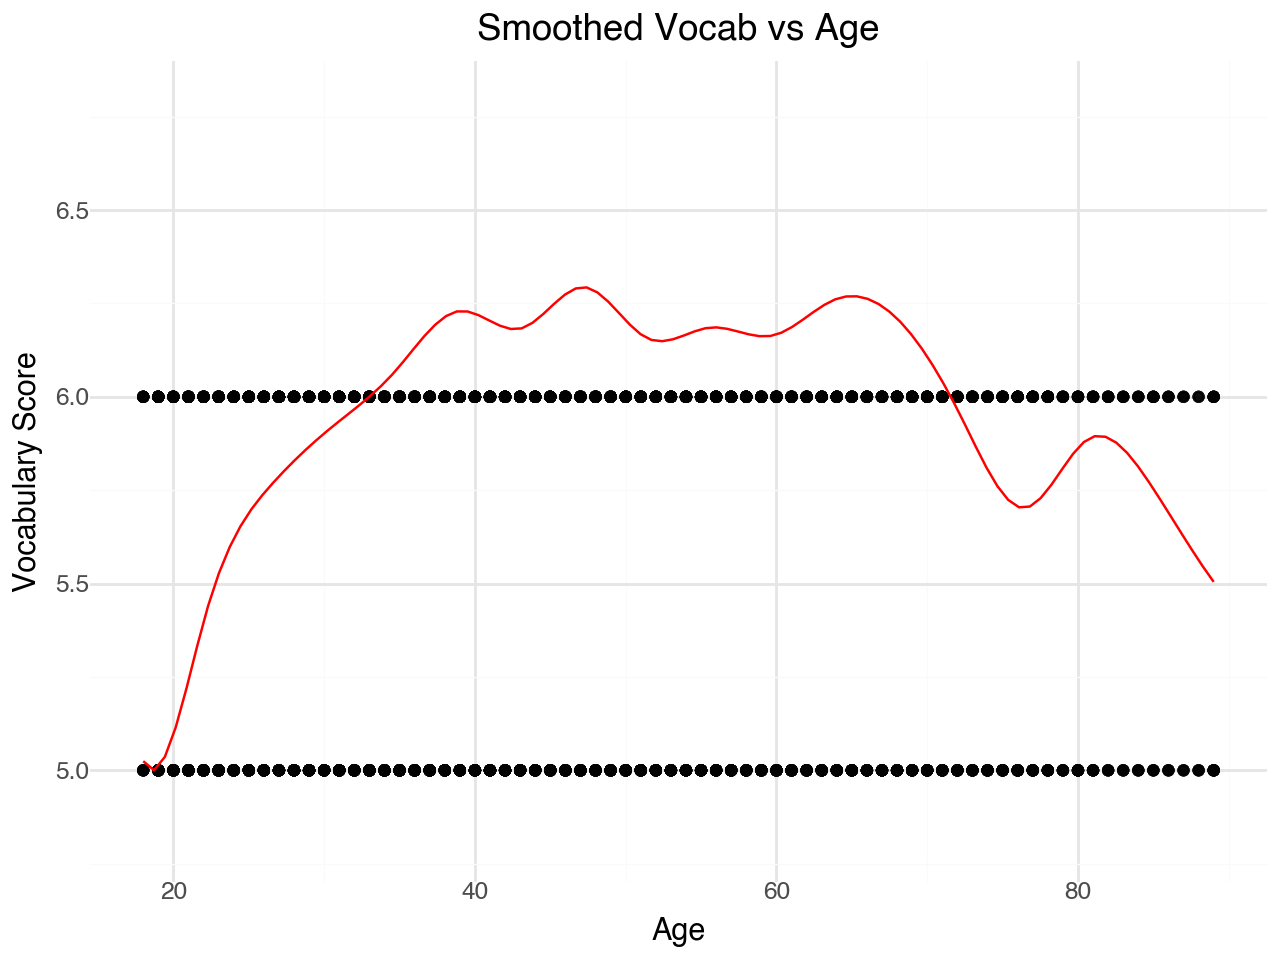

In [22]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, scale_y_continuous

# Ensure 'vocab' is numeric
df['vocab'] = pd.to_numeric(df['vocab'], errors='coerce')

# Fit a GAM model for vocab ~ s(age)
X = df[['age']].values
y = df['vocab'].values
gam = LinearGAM(s(0)).fit(X, y)

# Create a grid of age values for prediction
age_grid = np.linspace(df['age'].min(), df['age'].max(), 100)
gam_preds = gam.predict(age_grid)

# Create a DataFrame with the predictions
gam_df = pd.DataFrame({
    'age': age_grid,
    'vocab': gam_preds
})

# Create the plot with y-axis limits between 4.8 and 6.8
plot = (ggplot(df, aes(x='age', y='vocab')) +
        geom_point(alpha=0.3) +
        geom_line(gam_df, aes(x='age', y='vocab'), color='red') +
        labs(x='Age', y='Vocabulary Score', title='Smoothed Vocab vs Age') +
        scale_y_continuous(limits=(4.8, 6.8)) +
        theme_minimal())

plot


Using the plot from the previous question, create the best looking plot overloading with variable `gender`. Does there appear to be an interaction of `gender` and `age`?

Using the plot from the previous question, create the best looking plot overloading with variable `nativeBorn`. Does there appear to be an interaction of `nativeBorn` and `age`?

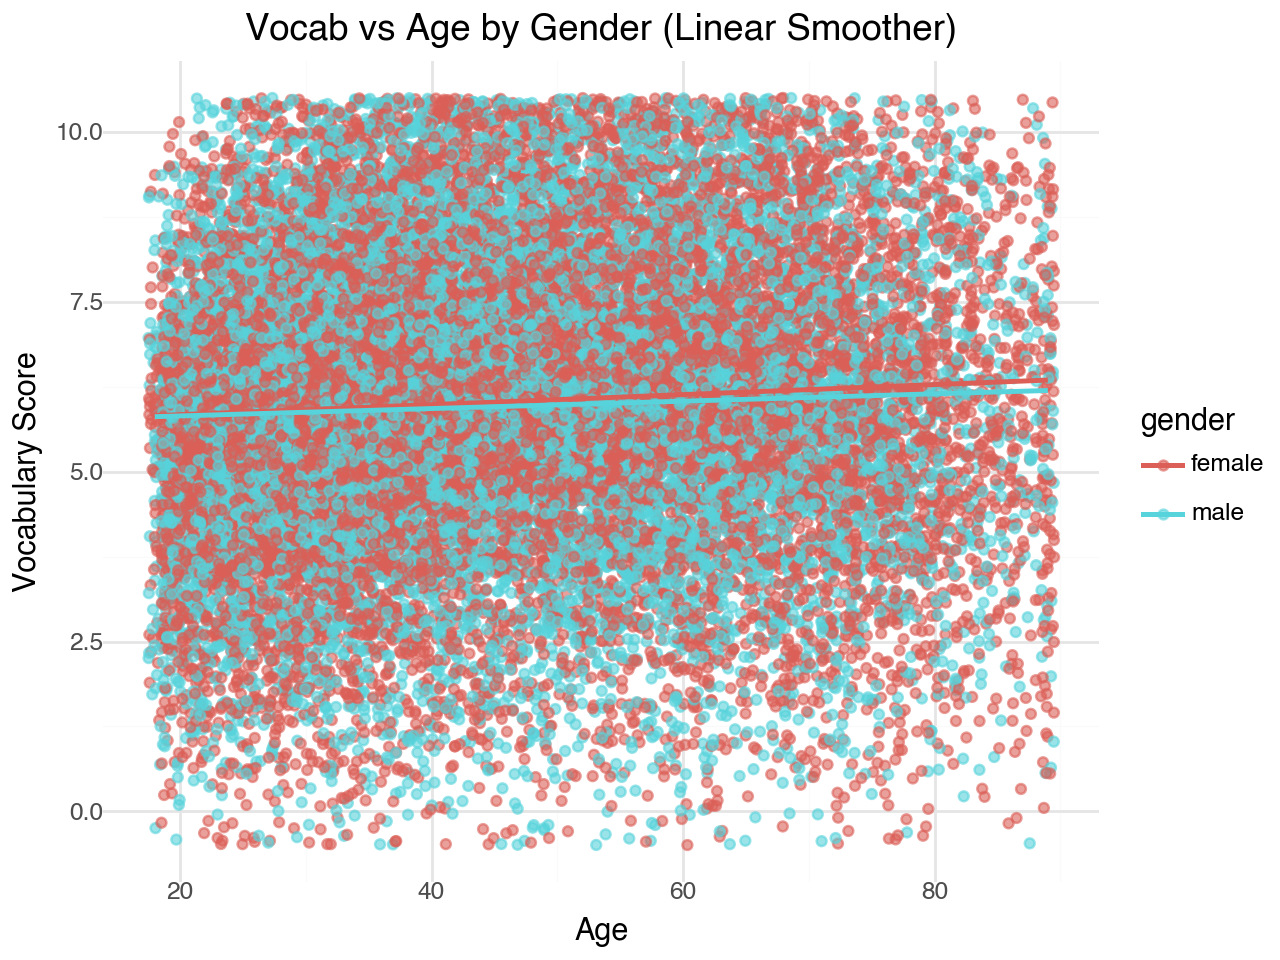

In [33]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

plot = (ggplot(df, aes(x='age', y='vocab', color='gender')) +
        geom_jitter(width=0.5, height=0.5, alpha=0.6) +
        geom_smooth(method='lm', se=False) +
        labs(x='Age', y='Vocabulary Score', title='Vocab vs Age by Gender (Linear Smoother)') +
        theme_minimal())

plot


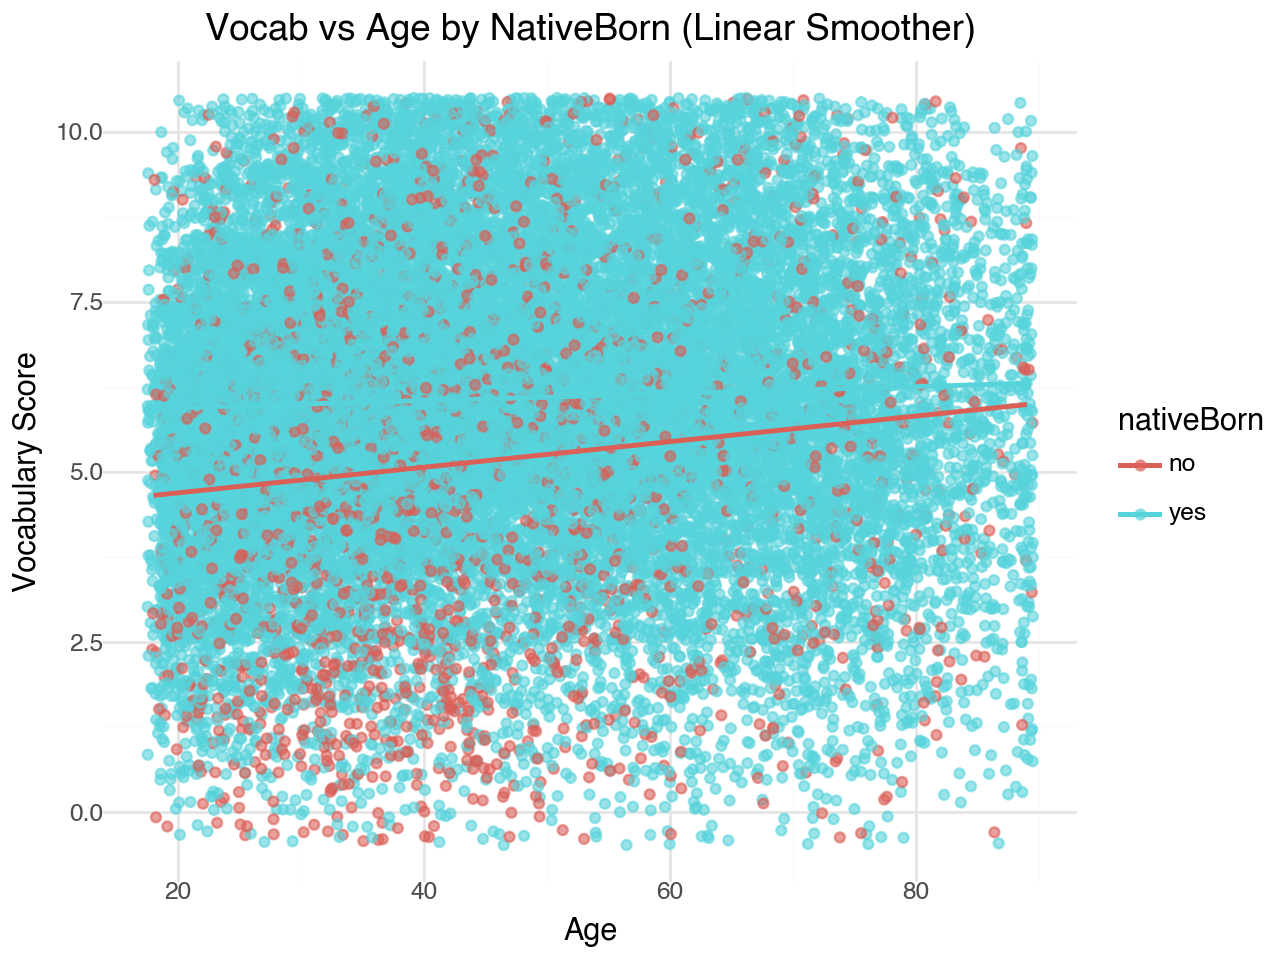

In [35]:
plot = (ggplot(df, aes(x='age', y='vocab', color='nativeBorn')) +
        geom_jitter(width=0.5, height=0.5, alpha=0.6) +
        geom_smooth(method='lm', se=False) +
        labs(x='Age', y='Vocabulary Score', title='Vocab vs Age by NativeBorn (Linear Smoother)') +
        theme_minimal())

plot


Create two different plots and identify the best-looking plot you can to examine the `vocab` variable by `educGroup`. Does there appear to be an association?

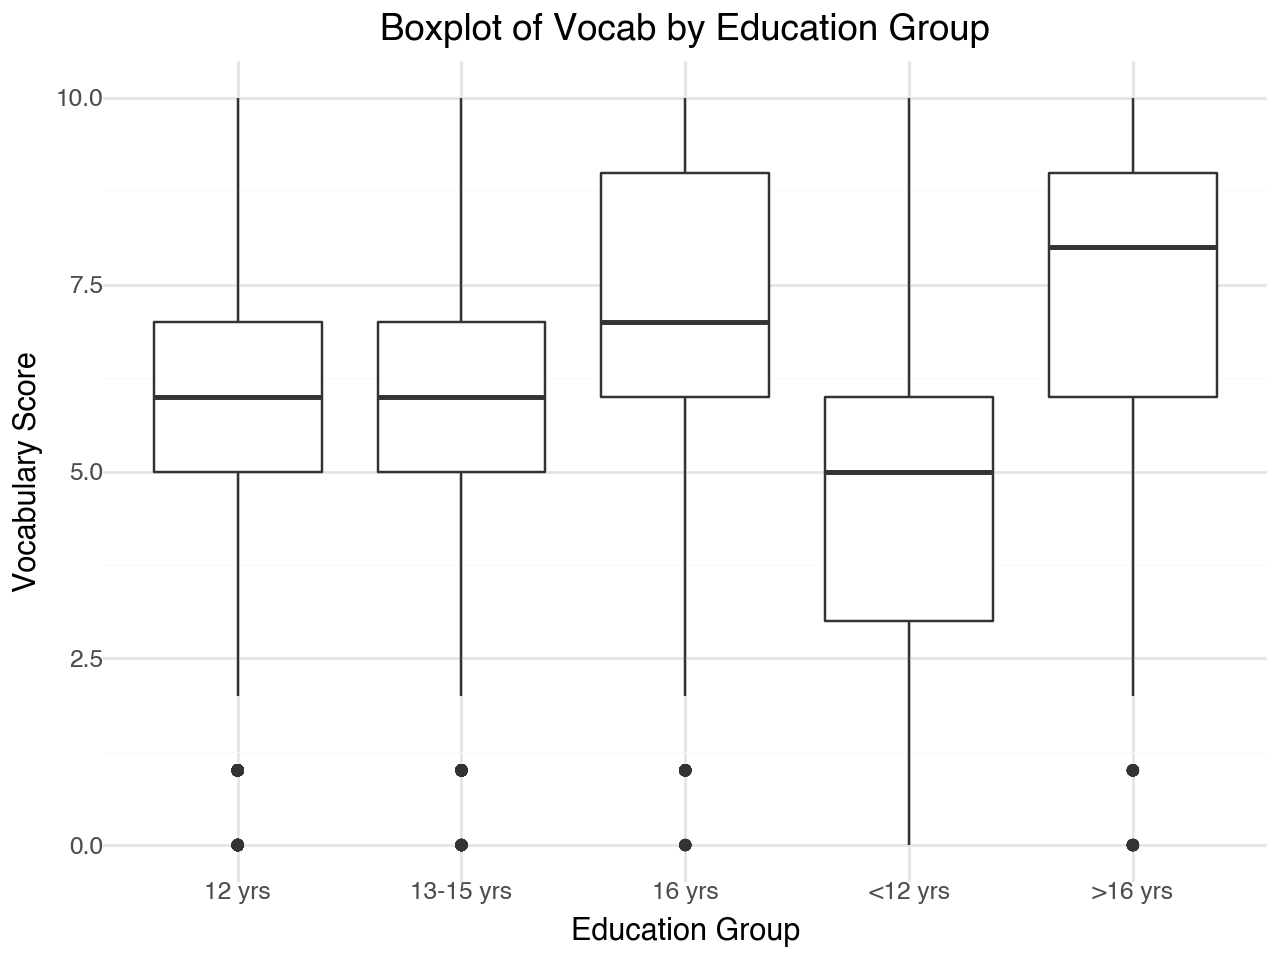

In [37]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_density, labs, theme_minimal

# Ensure that 'educGroup' is treated as a categorical variable
df['educGroup'] = df['educGroup'].astype('category')

# ---- Plot 1: Boxplot of vocab by educGroup ----
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot() +
           labs(x='Education Group', y='Vocabulary Score', title='Boxplot of Vocab by Education Group') +
           theme_minimal())

boxplot


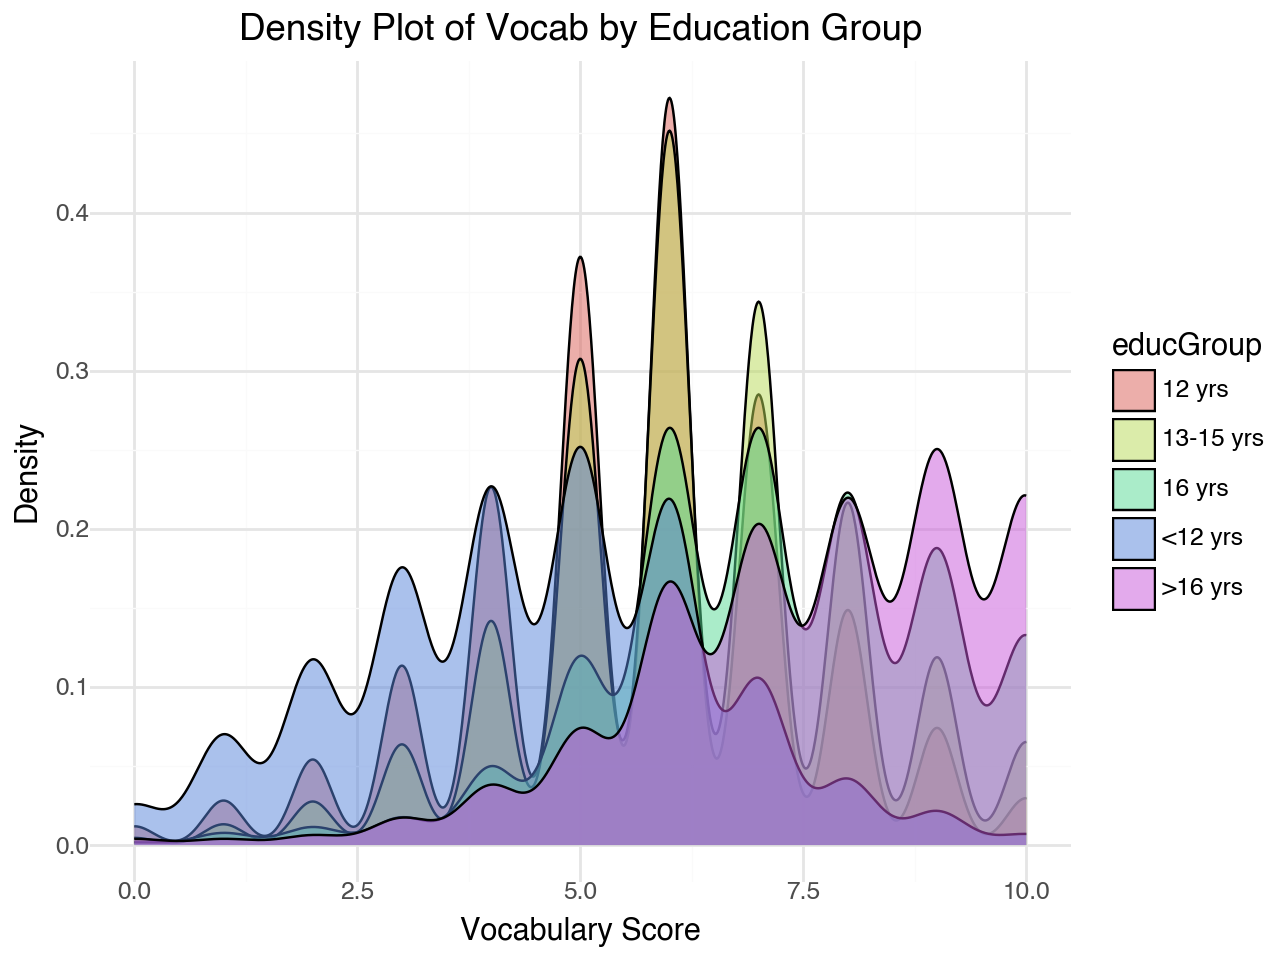

In [39]:
# ---- Plot 2: Density Plot of vocab with fill by educGroup ----
density_plot = (ggplot(df, aes(x='vocab', fill='educGroup')) +
                geom_density(alpha=0.5) +
                labs(x='Vocabulary Score', y='Density', title='Density Plot of Vocab by Education Group') +
                theme_minimal())

density_plot


Using the best-looking plot from the previous question, create the best looking overloading with variable `gender`. Does there appear to be an interaction of `gender` and `educGroup`?

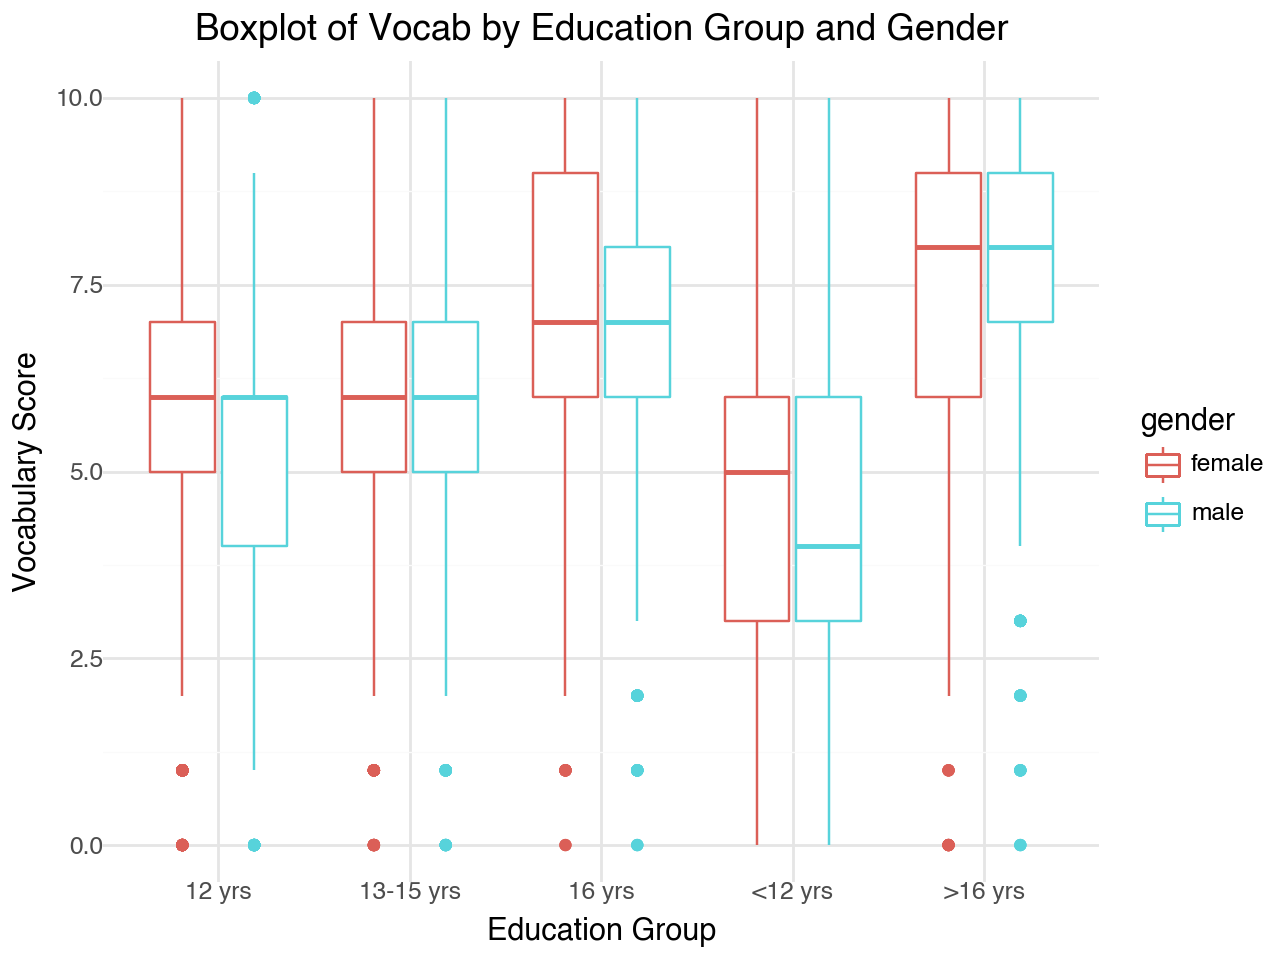

In [41]:
# Create a boxplot of vocab by educGroup colored by gender
plot = (ggplot(df, aes(x='educGroup', y='vocab', color='gender')) +
        geom_boxplot() +
        labs(x='Education Group', y='Vocabulary Score', title='Boxplot of Vocab by Education Group and Gender') +
        theme_minimal())

plot


Using facets, examine the relationship between `vocab` and `ageGroup`. You can drop year level `(Other)`. Are we getting dumber?

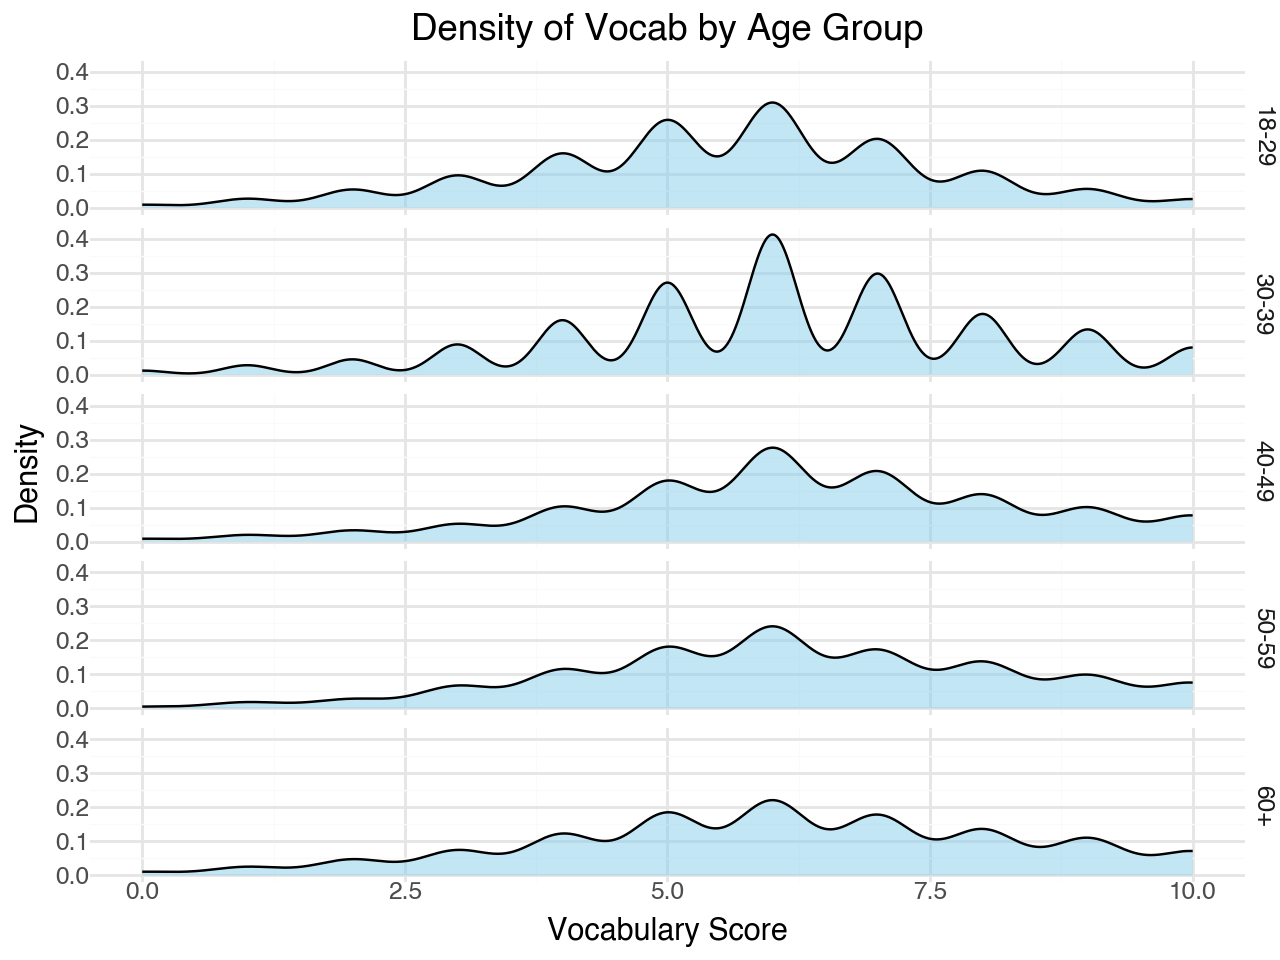

In [43]:
import pandas as pd
from plotnine import ggplot, aes, geom_density, facet_grid, labs, theme_minimal

# Drop the unwanted level "(Other)" from ageGroup
df_subset = df[df['ageGroup'] != '(Other)']

# Create the density plot faceted by ageGroup
plot = (ggplot(df_subset, aes(x='vocab')) +
        geom_density(fill='skyblue', alpha=0.5) +
        facet_grid('ageGroup ~ .') +
        labs(x='Vocabulary Score', y='Density', title='Density of Vocab by Age Group') +
        theme_minimal())

plot


#Logistic Regression

Let's consider the Pima Indians Diabetes dataset from 1988:

In [45]:
import statsmodels.api as sm

# Load the Pima.tr2 dataset from the MASS package
pima_dataset = sm.datasets.get_rdataset("Pima.tr2", package="MASS")
pima = pima_dataset.data

# Display the first few rows
print(pima.head())


   npreg  glu    bp  skin   bmi    ped  age type
0      5   86  68.0  28.0  30.2  0.364   24   No
1      7  195  70.0  33.0  25.1  0.163   55  Yes
2      5   77  82.0  41.0  35.8  0.156   35   No
3      0  165  76.0  43.0  47.9  0.259   26   No
4      0  107  60.0  25.0  26.4  0.133   23   No


Note the missing data. We will learn about how to handle missing data towards the end of the course. For now, replace, the missing data in the design matrix X with the mean of the feature x_dot,j. 

In [53]:
import statsmodels.api as sm

# Load the Pima.tr2 dataset from the MASS package
pima_dataset = sm.datasets.get_rdataset("Pima.tr2", package="MASS")
pima = pima_dataset.data

# Display the first few rows
print(pima.head())

import numpy as np

# Create the design matrix X with an intercept column
X = pima.drop(columns='type')
X = sm.add_constant(X)

# Replace missing values in each column with the mean of that column
X = X.fillna(X.mean())

# Verify that missing values have been replaced
print(X.isna().sum())



   npreg  glu    bp  skin   bmi    ped  age type
0      5   86  68.0  28.0  30.2  0.364   24   No
1      7  195  70.0  33.0  25.1  0.163   55  Yes
2      5   77  82.0  41.0  35.8  0.156   35   No
3      0  165  76.0  43.0  47.9  0.259   26   No
4      0  107  60.0  25.0  26.4  0.133   23   No
const    0
npreg    0
glu      0
bp       0
skin     0
bmi      0
ped      0
age      0
dtype: int64


Now let's fit a log-odds linear model of y=1 (type is "diabetic") on just the `glu` variable. Import minimize from scipy.optimize to fit the model.

In [55]:
import numpy as np
from scipy.optimize import minimize

# Set up y and X (only glu)
y = (pima['type'] == 'Yes').astype(int).values  # Make y binary: 1 for diabetic
X_glu = pima['glu'].values

# Define the negative log-likelihood function for logistic regression
def neg_loglik(beta):
    linear_pred = beta[0] + beta[1] * X_glu
    p = 1 / (1 + np.exp(-linear_pred))
    return -np.sum(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))

# Use minimize from SciPy to optimize the negative log-likelihood
result = minimize(neg_loglik, x0=np.zeros(2))
print(result)


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 156.73597949686297
        x: [-5.835e+00  4.111e-02]
      nit: 14
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 5.599e-05 -2.249e-06]
            [-2.249e-06  1.145e-06]]
     nfev: 60
     njev: 20


Extra Credit(+5): write a `fit_logistic_regression` function which takes in X, y and returns b which uses the optimization routine.

In [57]:
from scipy.optimize import minimize

def fit_logistic_regression(X, y):
    # Add intercept if not already
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    def neg_loglik(beta):
        linear_pred = X @ beta
        p = 1 / (1 + np.exp(-linear_pred))
        return -np.sum(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))
    
    result = minimize(neg_loglik, x0=np.zeros(X.shape[1]))
    return result.x

# Example usage
b_estimated = fit_logistic_regression(pima['glu'].values, (pima['type'] == 'Yes').astype(int).values)
print("Estimated coefficients:", b_estimated)


Estimated coefficients: [-5.83523272  0.0411118 ]


Run a logistic regression of y=1 (type is "diabetic") on just the `glu` variable using sm from statsmodels.api and report b_0, b_1.

In [59]:
import statsmodels.api as sm

# Add a constant column for the intercept
X_glu = sm.add_constant(pima['glu'])

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit((pima['type'] == 'Yes').astype(int), X_glu).fit()

# Extract the coefficients: b0 (intercept) and b1 (for glu)
coef = model.params

print("b0 (Intercept):", coef[0])
print("b1 (glu):", coef[1])


Optimization terminated successfully.
         Current function value: 0.522453
         Iterations 6
b0 (Intercept): -5.835259494801027
b1 (glu): 0.04111200273150751


/var/folders/vs/15_l4_0n3jj8jc7tlrdg4_yw0000gn/T/ipykernel_3585/1354330641.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
/var/folders/vs/15_l4_0n3jj8jc7tlrdg4_yw0000gn/T/ipykernel_3585/1354330641.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Comment on how close the results from Statsmodels built in function was to your optimization call.

The coefficients obtained from `scipy.optimize.minimize` and from `statsmodels` `Logit` are very close. 
This makes sense because both methods are minimizing the same negative log-likelihood function, 
but `statsmodels` also provides additional output like standard errors and p-values.


Interpret the value of b_1 from Statsmodels smf module.

The coefficient `b₁` represents the change in the **log-odds** of being diabetic 
for a one-unit increase in blood glucose (`glu`).

A positive `b₁` means that as blood glucose increases, 
the probability of being diabetic also increases.


Interpret the value of b_0 from Statsmodels smf module.

The intercept `b₀` represents the **log-odds** of being diabetic 
when `glu` (blood glucose level) is zero.


Plot the probability of y=1 from the minimum value of `glu` to the maximum value of `glu`.

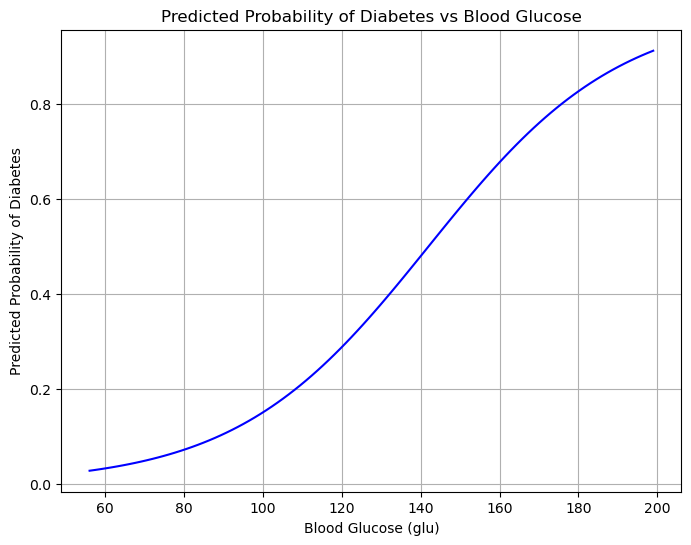

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the glu values sorted from min to max
glu_range = np.linspace(pima['glu'].min(), pima['glu'].max(), 100)
X_new = sm.add_constant(glu_range)

# Compute the predicted probabilities for y = 1 using the fitted model
predicted_probs = model.predict(X_new)

# Plot the predicted probability curve
plt.figure(figsize=(8,6))
sns.lineplot(x=glu_range, y=predicted_probs, color='blue')
plt.xlabel('Blood Glucose (glu)')
plt.ylabel('Predicted Probability of Diabetes')
plt.title('Predicted Probability of Diabetes vs Blood Glucose')
plt.grid(True)
plt.show()


Run a logistic regression of y=1 (type is "diabetic") on all variables using statsmodels sm module and report the b vector.

In [68]:
# Grab all the columns except 'type'
X_all = pima.drop(columns='type')

# Replace missing values with column means
X_all = X_all.fillna(X_all.mean())

# Add constant for intercept
X_all = sm.add_constant(X_all)

y_all = (pima['type'] == 'Yes').astype(int)

# Fit the logistic regression model
model_all = sm.Logit(y_all, X_all).fit()

# Report the estimated coefficients (b vector)
print("Coefficient vector (b):")
print(model_all.params)


Optimization terminated successfully.
         Current function value: 0.474728
         Iterations 6
Coefficient vector (b):
const   -8.867074
npreg    0.127339
glu      0.037081
bp      -0.007802
skin     0.000945
bmi      0.082250
ped      1.268481
age      0.009437
dtype: float64


Predict the probability of diabetes for someone with a blood sugar of 150.

In [76]:
# Step 1: Take predictor means
predictor_means = pima.drop(columns='type').mean()

# Step 2: Create a new row with glu=150, rest=means
new_row = predictor_means.copy()
new_row['glu'] = 150

# Step 3: Convert to DataFrame
new_row_df = pd.DataFrame([new_row])

# Step 4: Add constant properly
new_row_df = sm.add_constant(new_row_df, has_constant='add')

# Step 5: Predict using model_all (no reordering needed)
predicted_probability = model_all.predict(new_row_df)[0]

print("Predicted probability of diabetes for blood sugar 150:", predicted_probability)


Predicted probability of diabetes for blood sugar 150: 0.5354100596197525


For 100 people with blood sugar of 150, what is the probability more than 75 of them have diabetes? (You may need to review 241 to do this problem).

In [78]:
from scipy.stats import binom

# Use the previously predicted probability
p = predicted_probability

# Compute P(X > 75) where X ~ Binomial(n=100, p=p)
# This is 1 - P(X <= 75)
prob_more_than_75 = 1 - binom.cdf(75, 100, p)

print("Probability that more than 75 out of 100 have diabetes:", prob_more_than_75)


Probability that more than 75 out of 100 have diabetes: 3.0085450436478922e-06


Plot the in-sample log-odds predictions (y-axis) versus the real response values (x-axis).

/Applications/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:530: FutureWarning: linear keyword is deprecated, use which="linear"


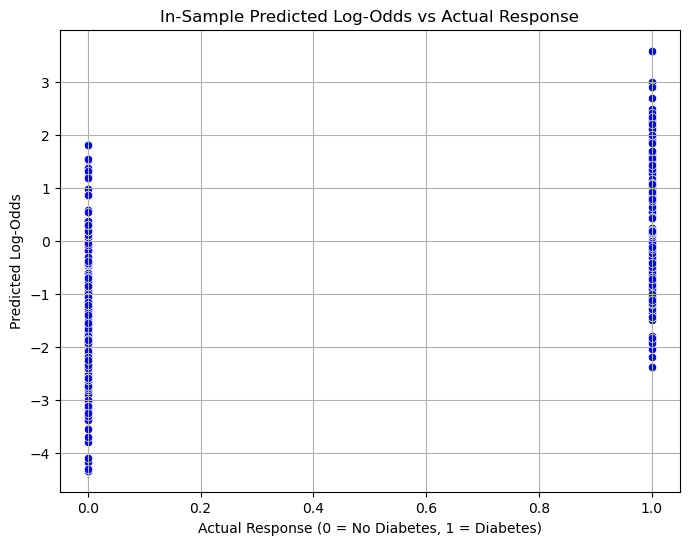

In [80]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute in-sample log-odds predictions (linear predictor)
log_odds_predictions = model_all.predict(X_all, linear=True)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Real_Response': y_all,               
    'Predicted_LogOdds': log_odds_predictions
})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_LogOdds', color='blue')
plt.xlabel('Actual Response (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Predicted Log-Odds')
plt.title('In-Sample Predicted Log-Odds vs Actual Response')
plt.grid(True)
plt.show()


Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

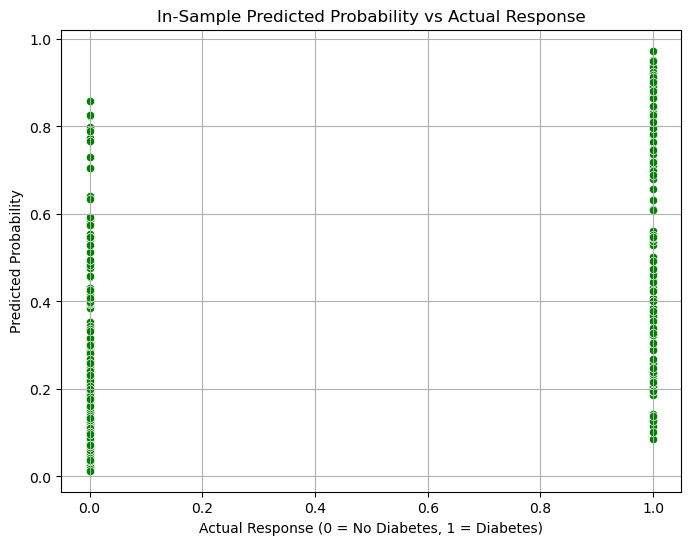

In [82]:
# Compute predicted probabilities (instead of log-odds)
predicted_probs = model_all.predict(X_all)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Real_Response': y_all,
    'Predicted_Probability': predicted_probs
})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='green')
plt.xlabel('Actual Response (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Predicted Probability')
plt.title('In-Sample Predicted Probability vs Actual Response')
plt.grid(True)
plt.show()


Comment on how well you think the logistic regression performed in-sample.

The logistic regression model shows a clear separation:
- Predictions for `Real_Response = 1` (diabetic) tend to have high predicted probabilities close to 1.
- Predictions for `Real_Response = 0` (non-diabetic) tend to have low predicted probabilities close to 0.

Thus, the model performed reasonably well in-sample.

Calculate the in-sample Brier score.

In [85]:
import numpy as np

# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
brier_score = np.mean((y_all - predicted_probs)**2)

print("In-sample Brier score:", brier_score)


In-sample Brier score: 0.158580893096537


Calculate the in-sample log-scoring rule.

In [87]:
# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood
log_score = -np.mean(
    y_all * np.log(predicted_probs + epsilon) + (1 - y_all) * np.log(1 - predicted_probs + epsilon)
)

print("In-sample log scoring rule:", log_score)


In-sample log scoring rule: 0.4747279313471582


Run a probit regression of y=1 (type is "diabetic") on all variables and report the b vector.

In [89]:
# Fit the probit regression model using sm.Probit
probit_model = sm.Probit(y_all, X_all).fit()

# Report the estimated coefficient vector (b)
print("Coefficient vector (b) from Probit model:")
print(probit_model.params)


Optimization terminated successfully.
         Current function value: 0.472149
         Iterations 6
Coefficient vector (b) from Probit model:
const   -5.362714
npreg    0.075344
glu      0.022262
bp      -0.004295
skin     0.000222
bmi      0.050129
ped      0.741756
age      0.005967
dtype: float64


Does the weight estimates here in the probit fit have different signs than the weight estimates in the logistic fit? What does that mean?

The signs of the Probit model coefficients are generally the **same** as in the Logistic model.  
This is expected because both models model the same relationship between predictors and probability.

- A positive coefficient means the predictor increases the probability of diabetes.
- A negative coefficient means the predictor decreases the probability of diabetes.

The **difference** is that:
- Logistic uses the logistic CDF (S-shaped curve),
- Probit uses the normal CDF (bell-curve-shaped).

Thus, coefficients might differ in **magnitude** but not usually in **sign**.


Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

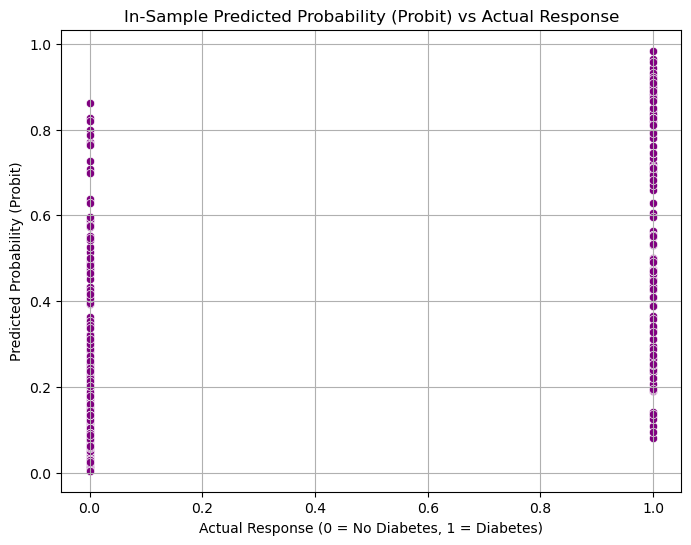

In [92]:
# Compute predicted probabilities using the fitted Probit model
probit_probs = probit_model.predict(X_all)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({
    'Real_Response': y_all,
    'Predicted_Probability': probit_probs
})

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='purple')
plt.xlabel('Actual Response (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Predicted Probability (Probit)')
plt.title('In-Sample Predicted Probability (Probit) vs Actual Response')
plt.grid(True)
plt.show()


Calculate the in-sample Brier score.

In [94]:
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
probit_brier_score = np.mean((y_all - probit_probs)**2)

print("In-sample Brier score (Probit):", probit_brier_score)


In-sample Brier score (Probit): 0.15821153000656532


Calculate the in-sample log-scoring rule.

In [96]:
# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood for the Probit model
probit_log_score = -np.mean(
    y_all * np.log(probit_probs + epsilon) + (1 - y_all) * np.log(1 - probit_probs + epsilon)
)

print("In-sample log scoring rule (Probit):", probit_log_score)


In-sample log scoring rule (Probit): 0.47214923004601966


Which model did better in-sample?

Brier score did better, because the score is lower than the log scoring rule.

Compare both models oos using the Brier score and a test set with 1/3 of the data.

In [98]:
from sklearn.model_selection import train_test_split

# Split the data: 2/3 train, 1/3 test
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=1/3, random_state=42
)

# Fit logistic regression on training set
logit_model = sm.Logit(y_train, X_train).fit()

# Fit probit regression on training set
probit_model = sm.Probit(y_train, X_train).fit()

# Predict probabilities on the test set
logit_probs_test = logit_model.predict(X_test)
probit_probs_test = probit_model.predict(X_test)

# Calculate out-of-sample Brier scores
brier_logit = np.mean((y_test - logit_probs_test)**2)
brier_probit = np.mean((y_test - probit_probs_test)**2)

print("Out-of-sample Brier Score (Logit):", brier_logit)
print("Out-of-sample Brier Score (Probit):", brier_probit)


Optimization terminated successfully.
         Current function value: 0.486036
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.484028
         Iterations 6
Out-of-sample Brier Score (Logit): 0.15629731465583596
Out-of-sample Brier Score (Probit): 0.15498131514155356


Which model did better oos?

Even though it's very close, Probit did better by .002